In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
data = pd.read_excel("waste weight with patient count 2023.xlsx")

data

,Unnamed: 0,Dump Date,waste weight,daily patients,precipitation_sum
0,0,2023-01-01,990,2803,0.0
1,1,2023-01-02,1210,3426,0.0
2,2,2023-01-03,1230,3483,0.0
3,3,2023-01-04,1230,3483,0.0
4,4,2023-01-05,1190,3370,0.3
...,...,...,...,...,...
360,360,2023-12-27,1310,3792,1.4
361,361,2023-12-28,1550,4486,12.7
362,362,2023-12-29,1760,5094,8.5
363,363,2023-12-30,1340,3879,21.6


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
bins = [0, 2.5, 7.5, 15, float('inf')]
labels = ['no', 'light', 'moderate', 'heavy']

data['cat_rain'] = pd.cut(data['precipitation_sum'], bins=bins, labels=labels, right=False)

data

,Dump Date,waste weight,daily patients,precipitation_sum,cat_rain
0,2023-01-01,990,2803,0.0,no
1,2023-01-02,1210,3426,0.0,no
2,2023-01-03,1230,3483,0.0,no
3,2023-01-04,1230,3483,0.0,no
4,2023-01-05,1190,3370,0.3,no
...,...,...,...,...,...
360,2023-12-27,1310,3792,1.4,no
361,2023-12-28,1550,4486,12.7,moderate
362,2023-12-29,1760,5094,8.5,moderate
363,2023-12-30,1340,3879,21.6,heavy


In [ ]:
data['Day of the week'] = data['Dump Date'].dt.dayofweek
data['Month'] = data['Dump Date'].dt.month
data['Day'] = data['Dump Date'].dt.day

In [ ]:
data.drop(columns=['precipitation_sum'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import joblib

In [ ]:
le = LabelEncoder()
data['cat_rain'] = le.fit_transform(data['cat_rain'])
joblib.dump(le, 'label encoder.pkl')

['label encoder.pkl']

In [ ]:
data['is_weekend'] = data['Day of the week'].apply(lambda x: 1 if x in [5, 6] else 0)  # Saturday & Sunday


In [ ]:
data

,Dump Date,waste weight,daily patients,cat_rain,Day of the week,Month,Day,is_weekend
0,2023-01-01,990,2803,3,6,1,1,1
1,2023-01-02,1210,3426,3,0,1,2,0
2,2023-01-03,1230,3483,3,1,1,3,0
3,2023-01-04,1230,3483,3,2,1,4,0
4,2023-01-05,1190,3370,3,3,1,5,0
...,...,...,...,...,...,...,...,...
360,2023-12-27,1310,3792,3,2,12,27,0
361,2023-12-28,1550,4486,2,3,12,28,0
362,2023-12-29,1760,5094,2,4,12,29,0
363,2023-12-30,1340,3879,0,5,12,30,1


In [ ]:
import seaborn as sns

                 Dump Date  waste weight  daily patients  cat_rain  \
Dump Date         1.000000      0.064256        0.041688 -0.313488   
waste weight      0.064256      1.000000        0.983355 -0.148020   
daily patients    0.041688      0.983355        1.000000 -0.130117   
cat_rain         -0.313488     -0.148020       -0.130117  1.000000   
Day of the week   0.011811     -0.176880       -0.185643  0.022811   
Month             0.996504      0.062314        0.039719 -0.323575   
Day               0.095131      0.027827        0.026156  0.095597   
is_weekend        0.007467     -0.199834       -0.208499  0.026331   

                 Day of the week     Month       Day  is_weekend  
Dump Date               0.011811  0.996504  0.095131    0.007467  
waste weight           -0.176880  0.062314  0.027827   -0.199834  
daily patients         -0.185643  0.039719  0.026156   -0.208499  
cat_rain                0.022811 -0.323575  0.095597    0.026331  
Day of the week         1.000000  

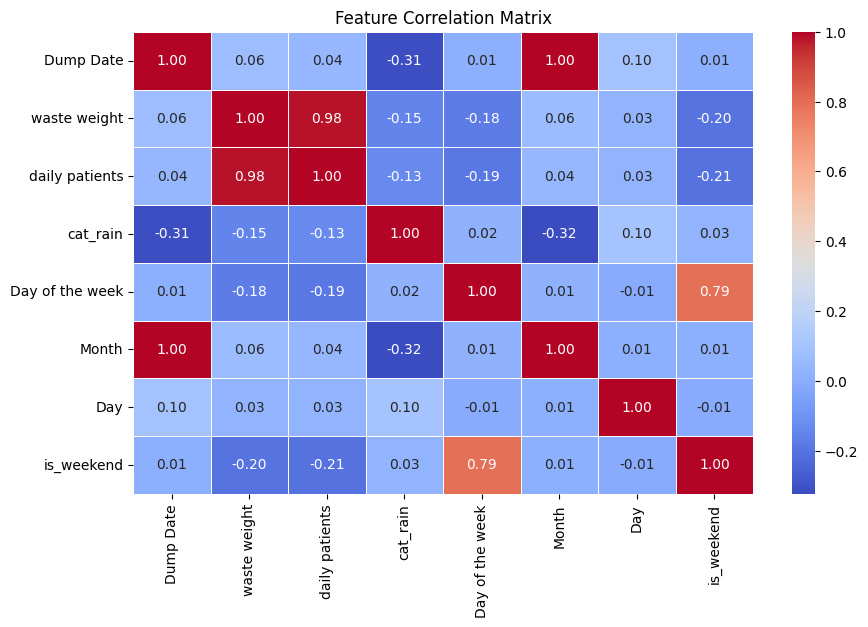

In [ ]:

correlation_matrix = data.corr()


print(correlation_matrix)


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
data.drop(columns=['Dump Date'], axis=1, inplace=True)

In [ ]:
data.drop(columns=['Day of the week'], axis=1, inplace=True)

                waste weight  daily patients  cat_rain     Month       Day  \
waste weight        1.000000        0.983355 -0.148020  0.062314  0.027827   
daily patients      0.983355        1.000000 -0.130117  0.039719  0.026156   
cat_rain           -0.148020       -0.130117  1.000000 -0.323575  0.095597   
Month               0.062314        0.039719 -0.323575  1.000000  0.011893   
Day                 0.027827        0.026156  0.095597  0.011893  1.000000   
is_weekend         -0.199834       -0.208499  0.026331  0.008368 -0.010773   

                is_weekend  
waste weight     -0.199834  
daily patients   -0.208499  
cat_rain          0.026331  
Month             0.008368  
Day              -0.010773  
is_weekend        1.000000  


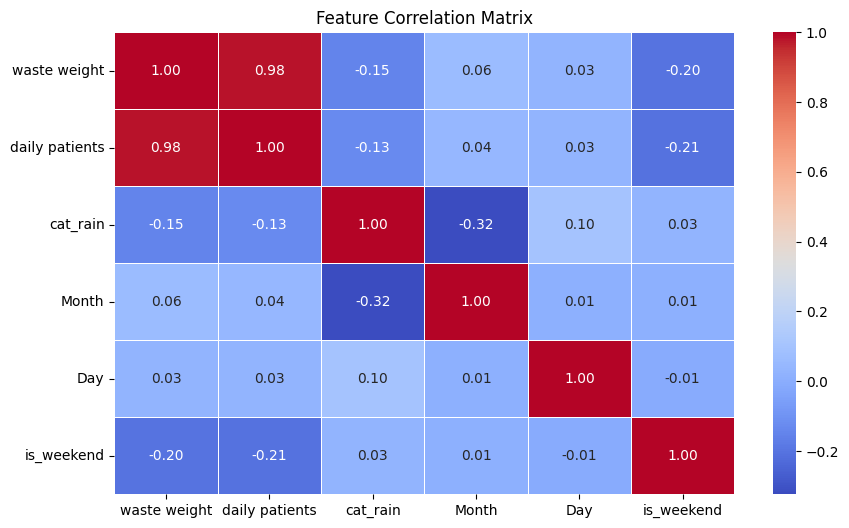

In [ ]:

correlation_matrix = data.corr()


print(correlation_matrix)


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:

y = data['waste weight']


X = data[[ 'Month', 'Day', 'cat_rain','daily patients']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data

,waste weight,daily patients,cat_rain,Month,Day,is_weekend
0,990,2803,3,1,1,1
1,1210,3426,3,1,2,0
2,1230,3483,3,1,3,0
3,1230,3483,3,1,4,0
4,1190,3370,3,1,5,0
...,...,...,...,...,...,...
360,1310,3792,3,12,27,0
361,1550,4486,2,12,28,0
362,1760,5094,2,12,29,0
363,1340,3879,0,12,30,1


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSE: 2470.4768132908293
RMSE: 49.70389132946061


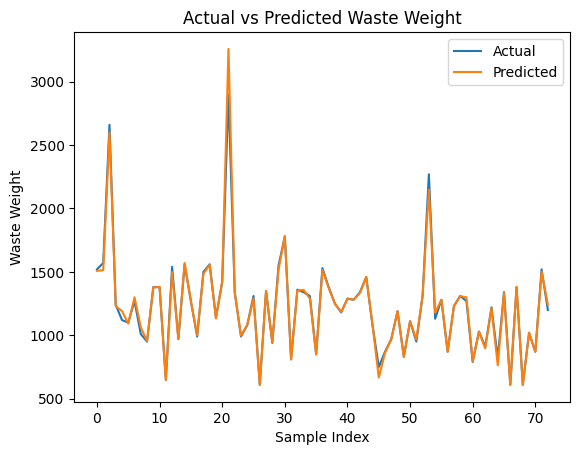

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

plt.figure()
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Waste Weight')
plt.title('Actual vs Predicted Waste Weight')
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSE: 1451.333835616438
RMSE: 38.096375623101444


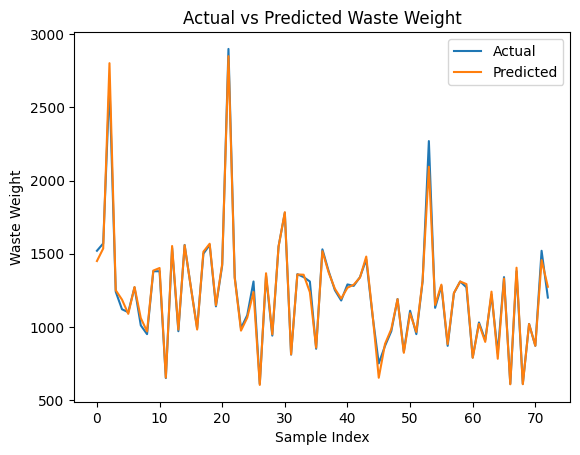

In [ ]:
def train_model(model):
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    plt.figure()
    plt.plot(y_test.values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.legend()
    plt.xlabel('Sample Index')
    plt.ylabel('Waste Weight')
    plt.title('Actual vs Predicted Waste Weight')
    plt.show()

    return model

from sklearn.ensemble import RandomForestRegressor
model = train_model(RandomForestRegressor(random_state=42))

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'testing_model.pkl')

['testing_model.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid
param_grid = {
    'n_estimators': [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400],          # Number of trees in the forest
    'max_depth': [10,15,20,25,30,35,40],          # Maximum depth of the trees
    'min_samples_split': [2,4,6,8,10,12,14,16,18,20,22,24],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2,3,4,5,6,7,8,9,10],            # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider for the best split
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for RMSE
    cv=2,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
predictions = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")

joblib.dump(best_rf_model, 'best random forest model.pkl')

Fitting 2 folds for each of 40320 candidates, totalling 80640 fits


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
26880 fits failed out of a total of 80640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13515 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\ASUS\AppData\Roaming\Py

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test MSE: 9222.36523521327
Test RMSE: 96.0331465443743


['best random forest model.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400],  # Number of trees
    'max_depth': [10,15,20,25,30,35,40],           # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'subsample': [0.6,0.8, 1.0,1.2],          # Subsample ratio of the training set
    'colsample_bytree': [0.8, 1.0],   # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],       # L1 regularization term on weights
    'reg_lambda': [1, 2, 5],          # L2 regularization term on weights
}

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=2,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
from sklearn.metrics import mean_squared_error

predictions = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")

joblib.dump(best_xgb_model, 'best XGB model.pkl')

Fitting 2 folds for each of 24192 candidates, totalling 48384 fits


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12096 fits failed out of a total of 48384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12096 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\xgboost\skle

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 375, 'reg_alpha': 0.1, 'reg_lambda': 5, 'subsample': 0.6}
Test MSE: 1543.0434125902718
Test RMSE: 39.281591268560796


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['best XGB model.pkl']